# Challenge Advanced Experimentation


## questions 

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
use a paired t-test, because the same group of people experienced both conditions of 2012 and 2014 


2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
use a paired t-test, because the same group of people experienced both conditions of 2012 and 2014 


3. Who reported watching more TV in 2012, men or women?
T-test for independent samples because men and women are two independent groups

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
T-test for independent samples because singles  and couples are two independent groups


5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Here a one way ANOVA should be used since there are more than two independent groups

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
Here a one way ANOVA should be used since there are more than two independent groups


## description for each column 
- cntry: Country DE=Germany, CH=Swizerland, CZ=Check Republic, ES=Spain, NO=Norway, SE=Sweeden
- year: year

- idno: Respondent's identification number

- tvtot: TV watching, total time on average weekday

- ppltrst: Most people can be trusted or you can't be too careful

- pplfair: Most people try to take advantage of you, or try to be fair

- pplhlp: Most of the time people helpful or mostly looking out for themselves

- happy: How happy are you

- sclmeet: How often socially meet with friends, relatives or colleagues

- sclact: Take part in social activities compared to others of same age

- gndr: Gender 1=Male, 2=Female

- agea: Age of respondent, calculated

- partner: Lives with husband/wife/partner at household grid 1=Single, 2=Partner

In [569]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import seaborn as sns
import warnings
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')


In [313]:
url = "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv"
s = requests.get(url).content
EUSSdf = pd.read_csv(io.StringIO(s.decode('utf-8')))

EUSSdf.head()


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [314]:
# display descriptive statistics
EUSSdf.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


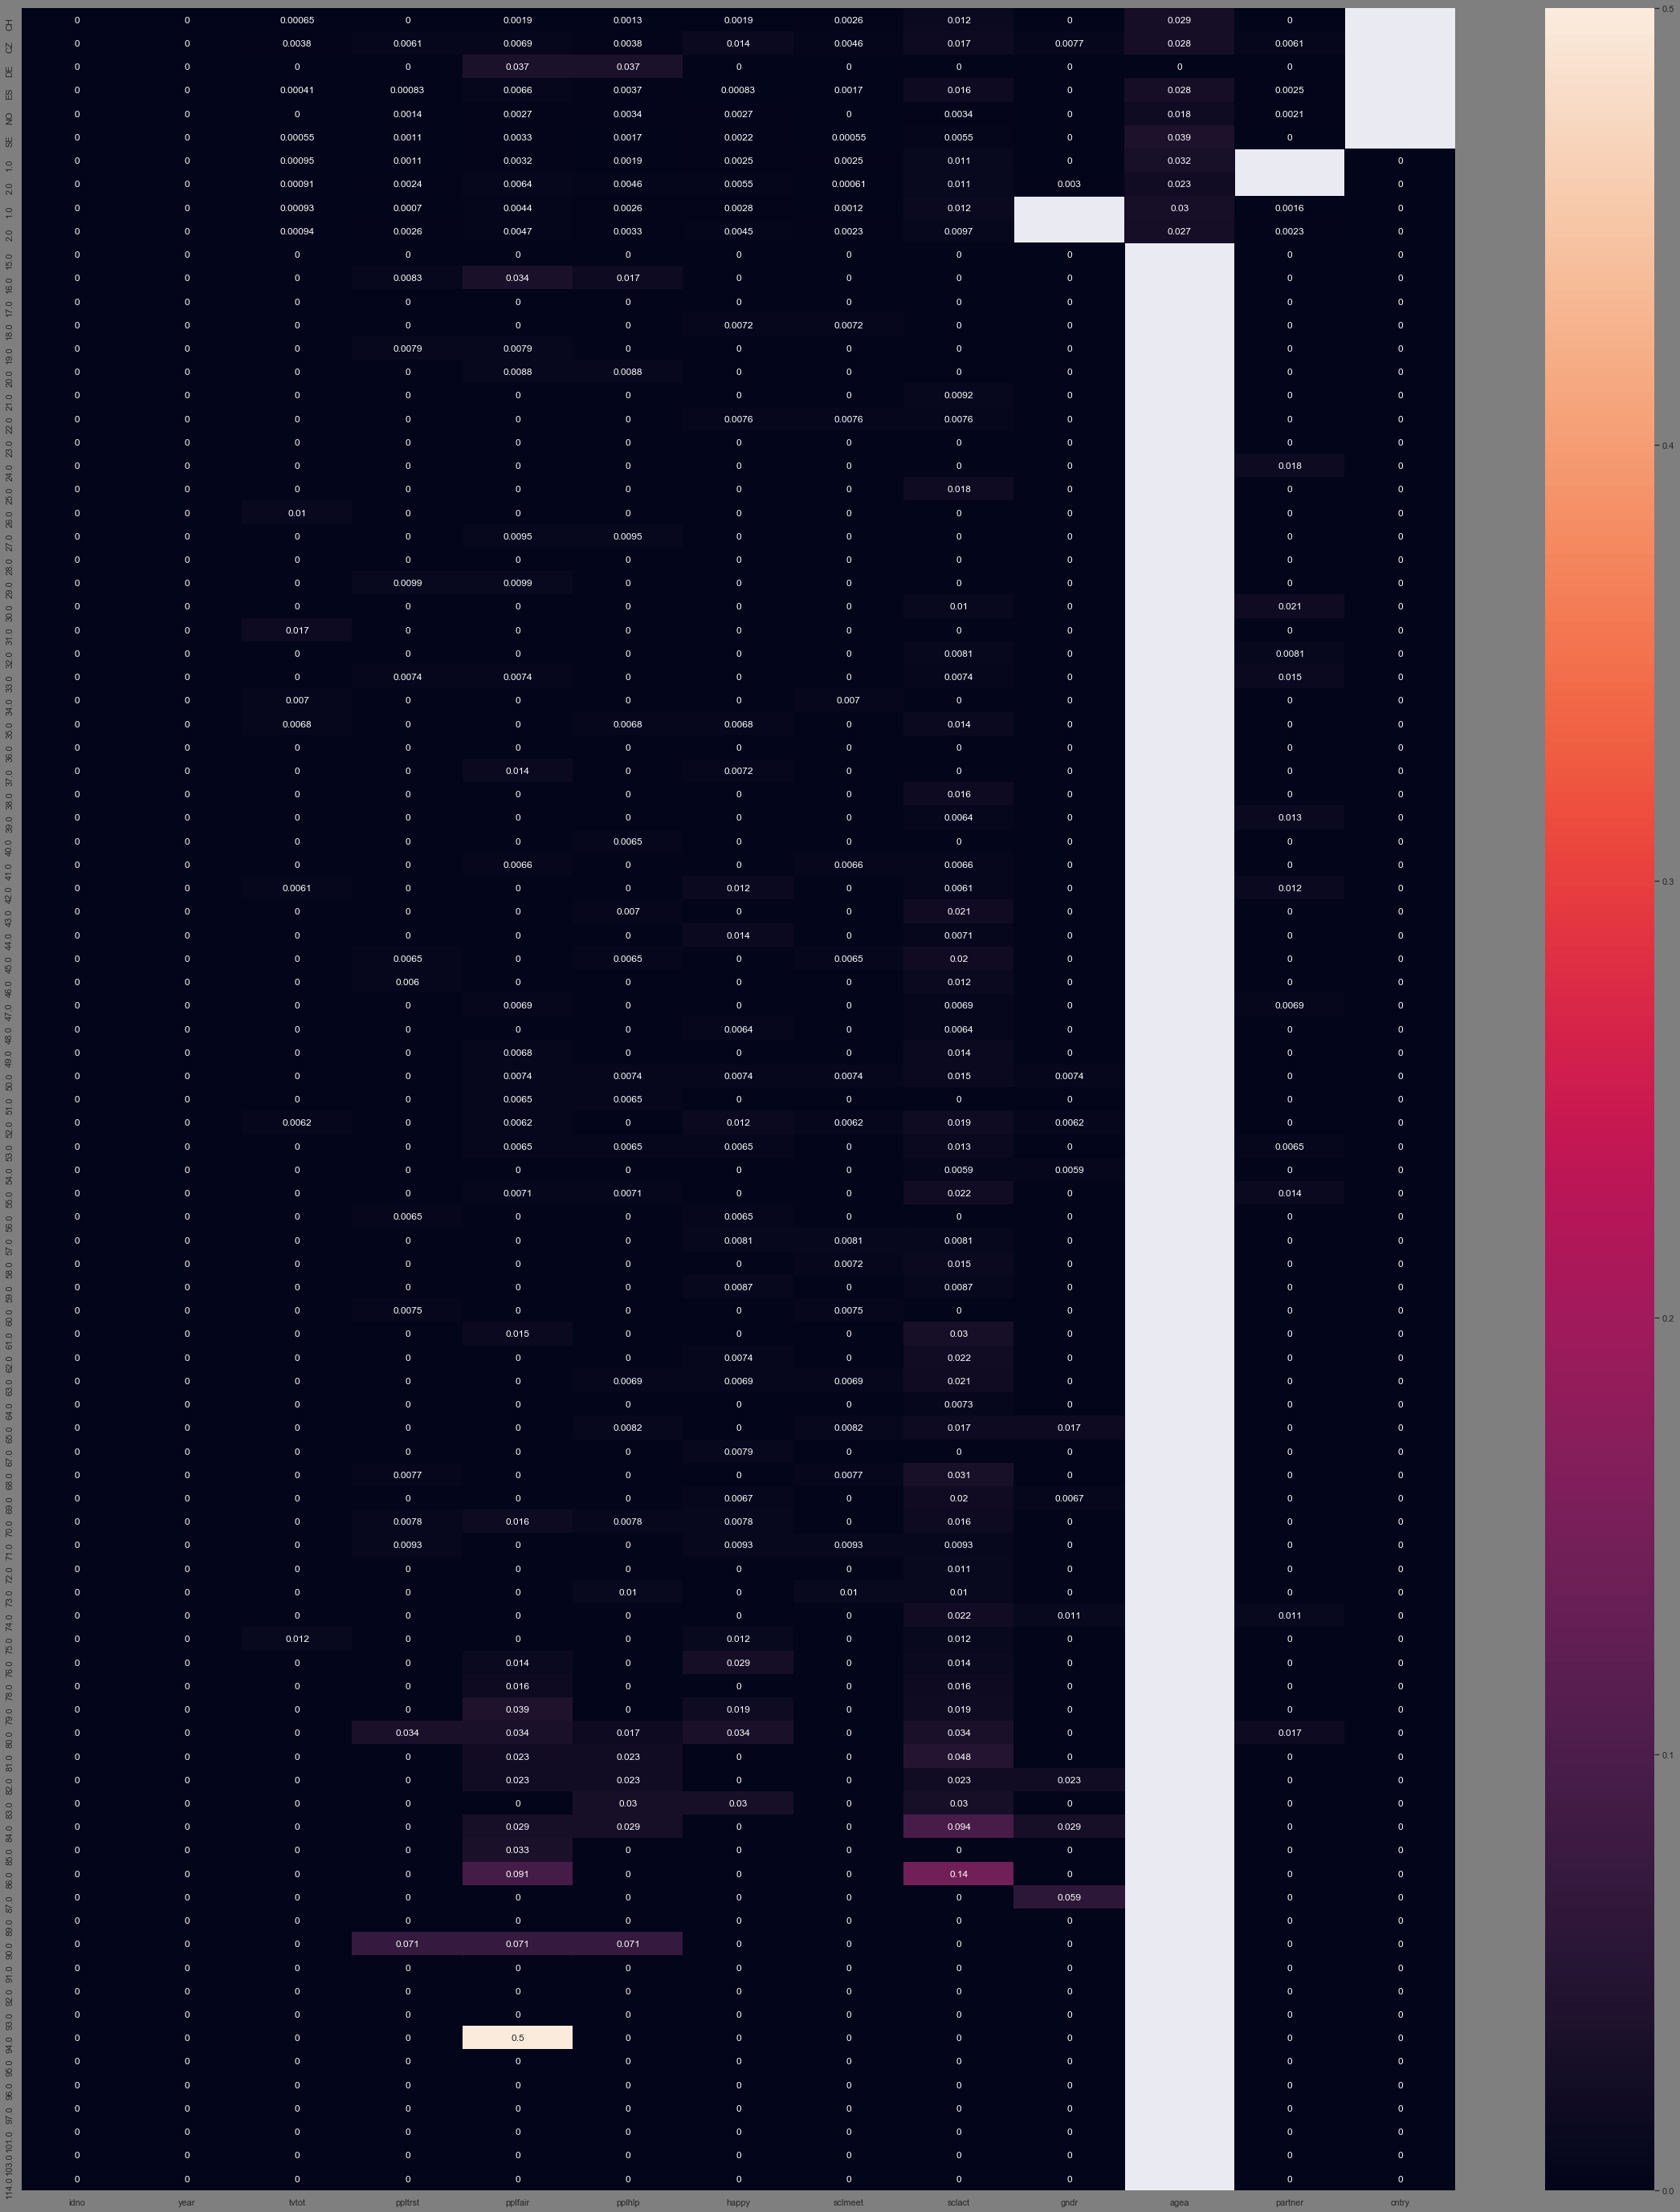

In [315]:
#Explore the catagories of country age gender and partner for missing values 
nulls = EUSSdf.isin([np.nan]).sum()
zeros = EUSSdf.isin([0]).sum()

age_nulls = EUSSdf.groupby('agea', axis = 0).agg(lambda x: x.isnull().sum())/EUSSdf.groupby('agea', axis = 0).count()    

country_nulls = EUSSdf.groupby('cntry', axis = 0).agg(lambda x: x.isnull().sum())/EUSSdf.groupby('cntry', axis = 0).count()  

partner_nulls = EUSSdf.groupby('partner', axis = 0).agg(lambda x: x.isnull().sum())/EUSSdf.groupby('partner', axis = 0).count()  

gender_nulls = EUSSdf.groupby('gndr', axis = 0).agg(lambda x: x.isnull().sum())/EUSSdf.groupby('gndr', axis = 0).count()  

null_df =  pd.DataFrame()

#transpose dataframe 
null_df = null_df.T
#add null and zero counts for 
null_df = null_df.append(country_nulls)
null_df = null_df.append(partner_nulls)
null_df = null_df.append(gender_nulls)
null_df = null_df.append(age_nulls)


#draw heatmap
fig = plt.figure(figsize = (40,50))
sns.heatmap(null_df,annot=True)#, xticklabels=labels, yticklabels=labels)



It appears that there are a large number of missing values for people age 94 for the question are people fair, missing values appear to increase with age especialy in the variables for fairness and social activity. This may bias results since the elderly may feel uncomfortable answering these questions due to situations outside of their control such as certain dissabilities that prevent them from participating. 

In [316]:
# get the unique id numbers 
num_floats = EUSSdf.idno.nunique()
# convert the column to integers
EUSSdf['idints'] =  EUSSdf.idno.astype(int)
num_ints = EUSSdf.idints.nunique()
# check to see if we lost any unique values 
print(num_floats -num_ints )

0


In [317]:
#since ID numbers repeat themselves for each country 
# remove the column holding the integers and make the idno column an integer variable by combining country and IDno
#We are able to give each person a unique ID to everyone in the datased 
EUSSdf = EUSSdf.drop(['idints'], axis=1)
EUSSdf.idno =  EUSSdf.idno.astype(int)
EUSSdf['country_Idno'] = EUSSdf.cntry +EUSSdf.idno.astype(str)
EUSSdf.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,country_Idno
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,CH5
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,CH25
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0,CH26
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,CH28
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,CH29


# Question 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Here we will use a paired t-test, or a Wilcoxon signed-rank test, because the same group of people experienced both conditions of 2012 and 2014. In order to be sure that the same group of people is being surveyed rows will have to be checked to have an IDno of both years this data can be used again in question 2. this type of data will likely exclude the very young and the very old

ppltrst
0  = you cant be too careful
10 = Most people can be trusted

year 
6 = 2012
7 = 2014


In [318]:

# create a dataframe that contains individuals sampled in both 2012 and 2014
notWorking_list =[]
notWorking_list = EUSSdf.country_Idno.loc[EUSSdf.ppltrst.isnull()].to_list()
print(notWorking_list)
Question1_df = pd.DataFrame()
Question1_df = EUSSdf[~EUSSdf['country_Idno'].isin(notWorking_list)]



['CZ1101', 'CZ1268', 'CZ1308', 'CZ1316', 'CZ1331', 'CZ2097', 'CZ2118', 'CZ1314', 'ES814', 'ES1921', 'NO10836', 'NO18678', 'SE499', 'SE3561']


In [319]:
Question1_df.ppltrst.isnull().value_counts()

False    8566
Name: ppltrst, dtype: int64

In [341]:
# create a Function to test for normality of with histgrams boxplot QQ plot Normality Test and Jarque Berra Test 
def normality_testing(data,title,color_list):
    from scipy.stats import boxcox
    from scipy.stats import jarque_bera
    from scipy.stats import normaltest

    #data = Question1_df.ppltrst.loc[Question1_df.year == 6 ].to_list()

    # input the mean, standard deviation and lenght of the residuals
    normal = np.random.normal(np.mean(data), np.std(data), len(data))
    int_normal = np.round(normal,0)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.hist(data,color = color_list[0],alpha = 0.8)
    plt.hist(int_normal,color = color_list[1], alpha = 0.2)
    plt.title('histogram of {}'.format(title))

    #Generate a Box Plot of solar system counts
    plt.subplot(1, 3, 2)
    plt.boxplot(data)
    plt.title('boxplot of {}'.format(title))

    #Generate a QQ plot of the gamma distribution and the solar system counts 
    plt.subplot(1, 3, 3)
    orderd_normal = sorted(normal)
    ordered_data=sorted(data)
    plt.scatter(ordered_data,orderd_normal, color = color_list[2], alpha = 0.8)
    plt.scatter(int_normal,int_normal, color = color_list[3],alpha = 0.5)
    plt.plot(orderd_normal,orderd_normal,color= color_list[3])
    plt.title('QQPlot of Random normal Distribution and {}'.format(title))
    plt.show()

    jb_stats = jarque_bera(data)
    norm_stats = normaltest(data)
    alpha = 0.05 # the threshold for the p-value
    p = norm_stats[1]

    #null hypothesis = the variable follows a normal distribution
    #alternative hypothesis = the variable does not follow a normal distribution 
    # if the p-value is below a certain threshold then we reject the null hypothesis 
    print(norm_stats)
    if p < alpha:  
        print("For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution")

    else:
        print("For the Normality test, the null hypothesis is accepted, and the data follows a normal distribution")
    print('the Jarque berra stat is {}, and the pvalue is {}'.format(jb_stats[0],jb_stats[1]))


In [342]:
Question1_df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

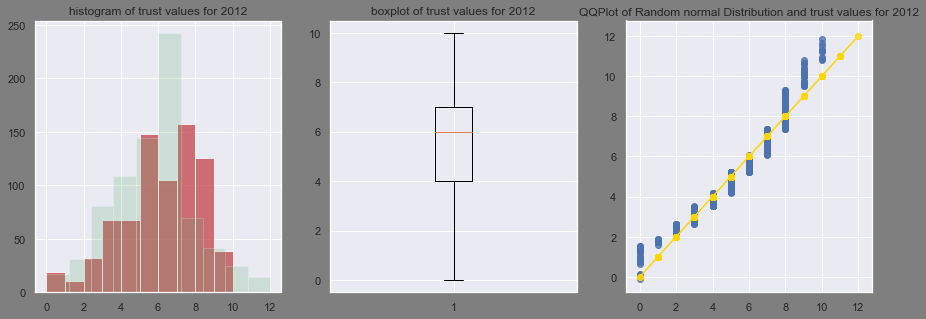

NormaltestResult(statistic=34.41403485540727, pvalue=3.365792056559453e-08)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 38.33692506862212, and the pvalue is 4.734155290009312e-09


In [343]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'CH')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

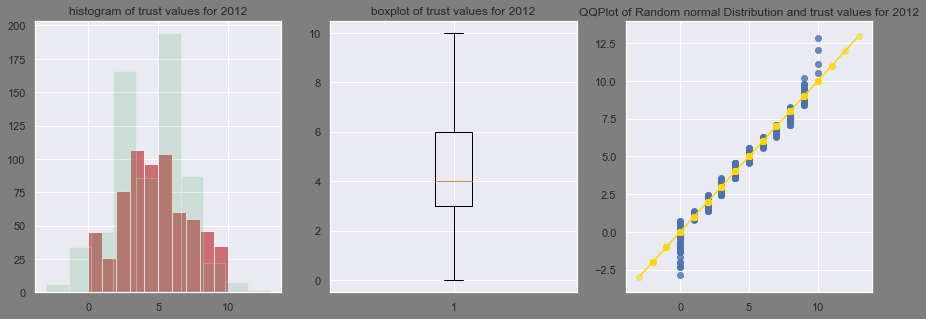

NormaltestResult(statistic=25.37334460803209, pvalue=3.0920622216317257e-06)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 13.110432307943675, and the pvalue is 0.0014226753168461448


In [344]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'CZ')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

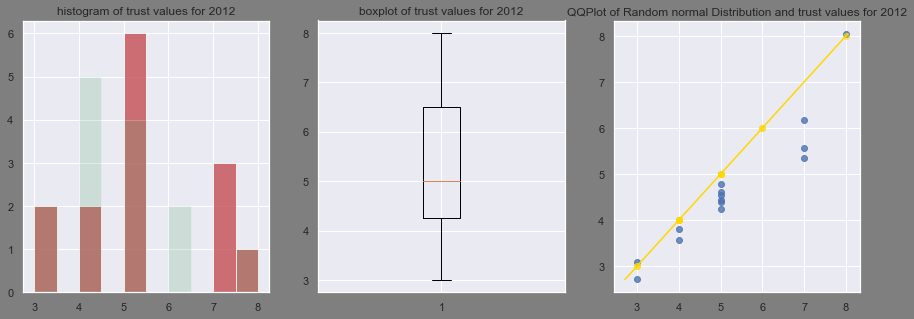

NormaltestResult(statistic=0.5537028123495471, pvalue=0.7581671476973477)
For the Normality test, the null hypothesis is accepted, and the data follows a normal distribution
the Jarque berra stat is 0.605097141096171, and the pvalue is 0.7389325970260872


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [345]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'DE')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

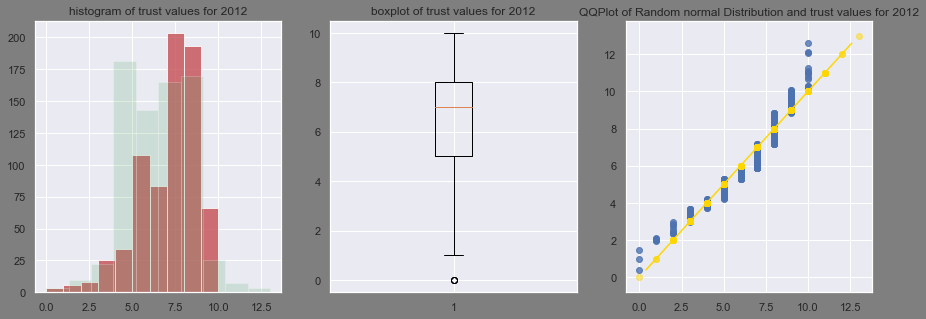

NormaltestResult(statistic=85.03863289787891, pvalue=3.4205464463561705e-19)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 117.0088767628921, and the pvalue is 0.0


In [346]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'NO')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

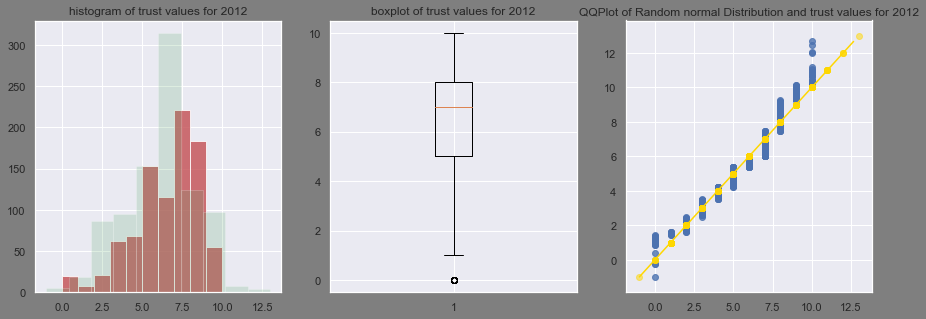

NormaltestResult(statistic=72.63429101187288, pvalue=1.6891340175735843e-16)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 88.36820614234523, and the pvalue is 0.0


In [347]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'SE')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

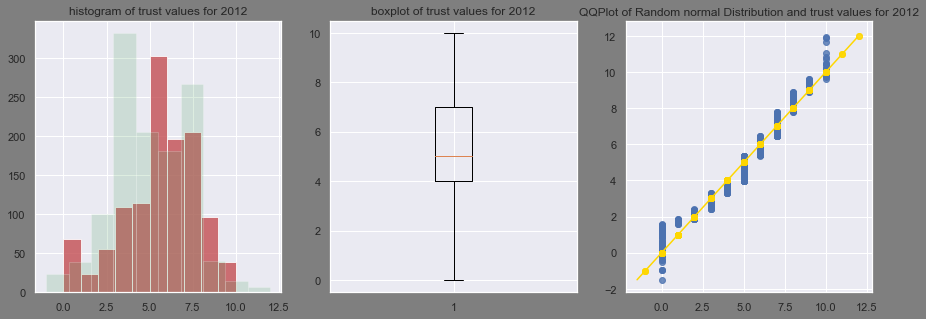

NormaltestResult(statistic=47.51873623285548, pvalue=4.802170035624733e-11)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 52.32275833120451, and the pvalue is 4.347633364432113e-12


In [349]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 6)&(Question1_df.cntry == 'ES')].to_list()
title = "trust values for 2012"
color_list = ['r','g','b','gold']
normality_testing(data,title,color_list)

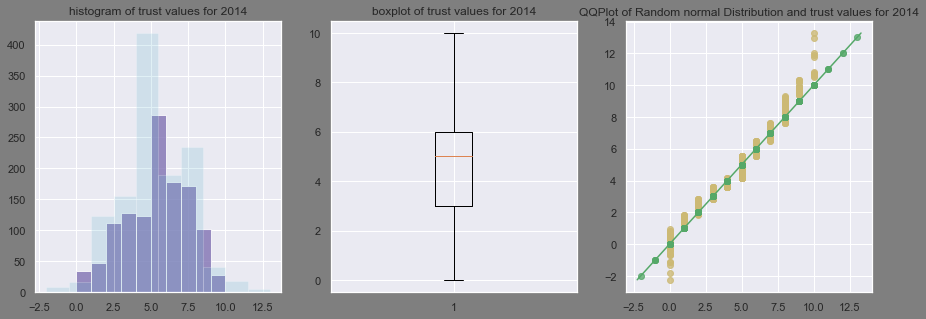

NormaltestResult(statistic=29.79659397866957, pvalue=3.3865058313911153e-07)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 23.495389893715476, and the pvalue is 7.907531115347588e-06


In [351]:
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'ES')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

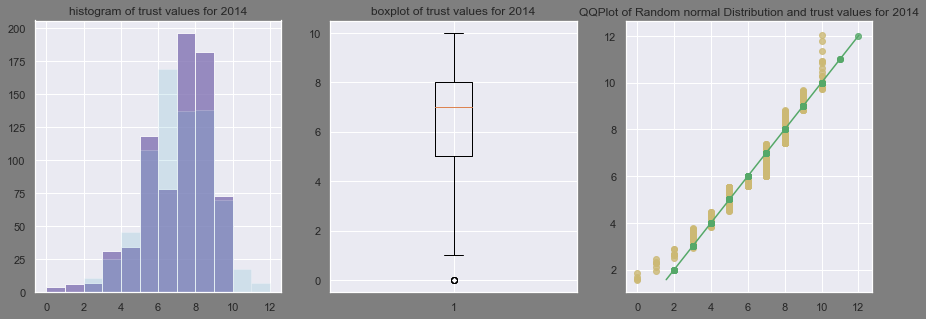

NormaltestResult(statistic=71.18484086640849, pvalue=3.4866488314772224e-16)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 91.65815346055193, and the pvalue is 0.0


In [352]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'NO')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

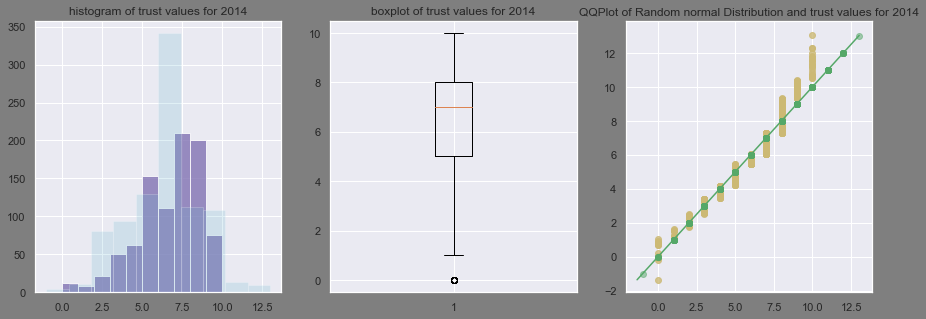

NormaltestResult(statistic=66.05295513914353, pvalue=4.537148927913469e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 78.80269308847434, and the pvalue is 0.0


In [353]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'SE')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

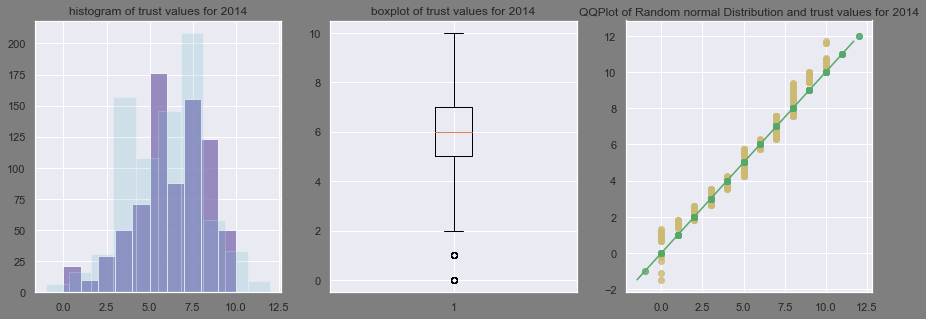

NormaltestResult(statistic=32.07122389622901, pvalue=1.0859809748932778e-07)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 35.19465715481645, and the pvalue is 2.2781237007940547e-08


In [354]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'CH')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

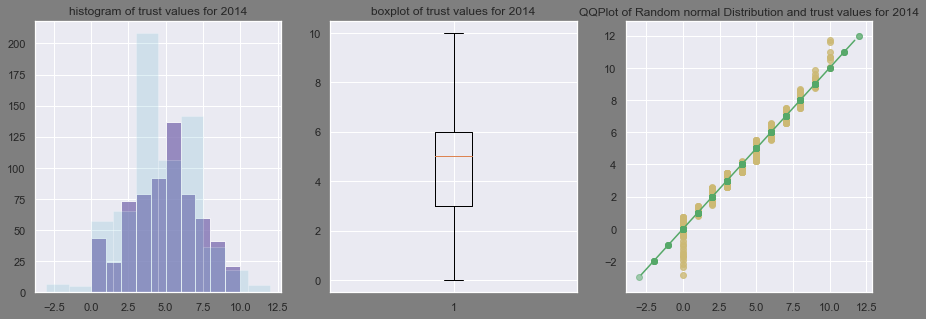

NormaltestResult(statistic=8.566961284450933, pvalue=0.013794564486135795)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 5.516930541596323, and the pvalue is 0.063388978661442


In [355]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'CZ')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

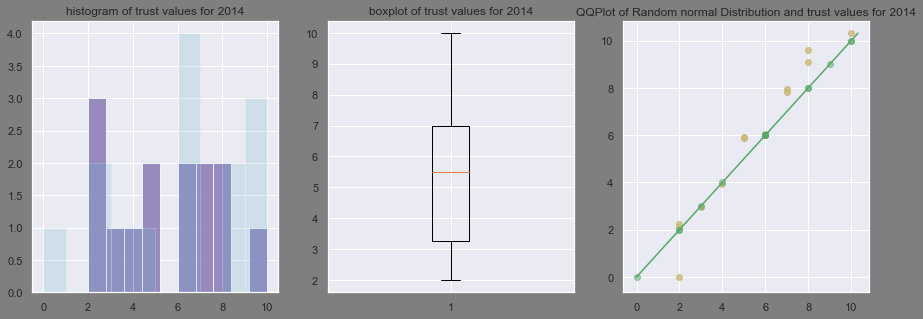

NormaltestResult(statistic=0.6451892229565249, pvalue=0.7242674045554323)
For the Normality test, the null hypothesis is accepted, and the data follows a normal distribution
the Jarque berra stat is 0.592402775688584, and the pvalue is 0.7436376533553437


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [356]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question1_df.ppltrst.loc[(Question1_df.year == 7)&(Question1_df.cntry == 'DE')].to_list()
title = "trust values for 2014"
color_list = ['m','c','y','g']
normality_testing(data,title,color_list)

At first look it appears that many of the samples follow a normal distribution,with the exception of Germany, most  fall within a normal distribution on the histogram, with very few outliers, the QQ plots suggest that if the data were continuous it might follow a normall distribution. Yet when the data is tested it fails to pass as normal data, this is likley because the variables are ordinal. They come from a likert scale where the coorespondants only have integers between one and ten as options. varialbes ranked on likert scales will typicaly not pass a normality test, because the vriables are not continuous. This results in a dilema of interpretation for the data since the concept of trust is likley a continuous variable. Therefore we will conduct a paired T-test along with the wilcoxon test. The paired T-test result migth provide insigt as to how the data would perform if a continuous variable was availible that measured peoples trust. 

In [362]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel

Peoples_trust_df = pd.DataFrame()
country_list = []
country_list = Question1_df.cntry.unique().tolist()
W_stat =[] 
W_pval =[]
T_stat =[] 
P_vale =[]
cntry_ =[]
for country in country_list:
    w, p = wilcoxon(Question1_df.ppltrst.loc[(Question1_df.year == 6 )&(Question1_df.cntry == country )],
                Question1_df.ppltrst.loc[(Question1_df.year == 7)& (Question1_df.cntry == country )],
                alternative = 'less')
    Tstat, Pvalue = ttest_rel(Question1_df.ppltrst.loc[(Question1_df.year == 6 )&(Question1_df.cntry == country )],
                              Question1_df.ppltrst.loc[(Question1_df.year == 7)& (Question1_df.cntry == country )])
    W_stat.append(w)
    W_pval.append(p)
    T_stat.append(Tstat)
    P_vale.append(Pvalue)
    cntry_.append(country)
    
Peoples_trust_df['cntry_'] = cntry_
Peoples_trust_df['W_stat'] = W_stat
Peoples_trust_df['W_pval'] = W_pval
Peoples_trust_df['T_stat'] = T_stat
Peoples_trust_df['P_vale'] = P_vale

Peoples_trust_df.head()

,cntry_,W_stat,W_pval,T_stat,P_vale
0,CH,106278.5,0.220564,-0.658685,0.510294
1,CZ,82837.0,0.311212,-0.500164,0.617129
2,DE,44.0,0.457857,-0.183995,0.856856
3,ES,294727.5,0.996228,2.456191,0.014182
4,NO,88363.0,0.641647,0.507308,0.612093


### Results:
Based on the Wilcoxon test we fail to reject the nullhypothesis  that the two samples have the same distribution of trust, with the same median. So it can be assumed that there is no significant difference in peoples trust between 2012 snd 2014 for each country.


# Question 2 Did people become happier from 2012 to 2014? Compute results for each country in the sample. 
Depending on normality, a paired t-test or a Wilcoxon test  should be used, because the same group of people experienced both conditions of 2012 and 2014

0 = Extremely unhappy
10 = Extremely happy

In [425]:
notWorking_list =[]
notWorking_list = EUSSdf.country_Idno.loc[EUSSdf.happy.isnull()].to_list()
print(notWorking_list)
Question2_df = pd.DataFrame()
Question2_df = EUSSdf[~EUSSdf['country_Idno'].isin(notWorking_list)]



['CH715', 'CH789', 'CH2397', 'CZ1039', 'CZ1058', 'CZ1066', 'CZ1149', 'CZ1177', 'CZ1243', 'CZ1246', 'CZ1289', 'CZ1386', 'CZ1388', 'CZ1472', 'CZ2119', 'CZ1036', 'CZ1040', 'CZ1109', 'CZ1164', 'CZ1266', 'CZ1387', 'ES1210', 'ES885', 'NO9846', 'NO10836', 'NO14862', 'NO20076', 'SE1494', 'SE165', 'SE252', 'SE787']


In [426]:
Question2_df.happy.isnull().value_counts()

False    8532
Name: happy, dtype: int64

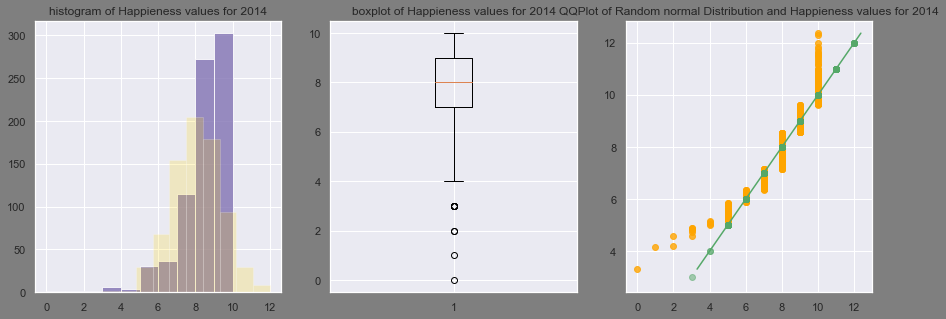

NormaltestResult(statistic=188.44583258657116, pvalue=1.2009014936632828e-41)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 506.57770042001073, and the pvalue is 0.0


In [428]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'CH')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

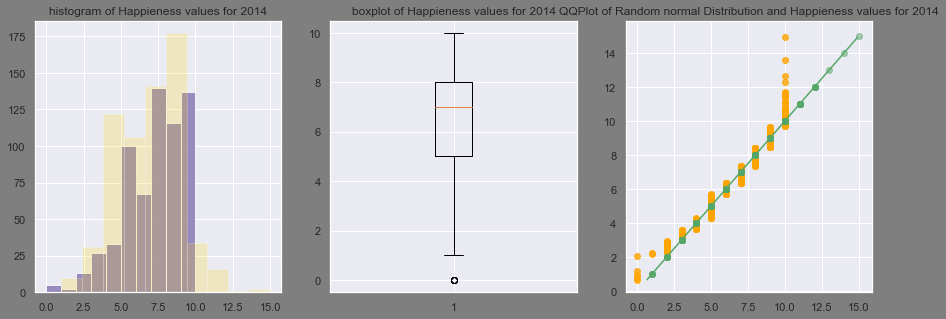

NormaltestResult(statistic=33.01518783857956, pvalue=6.773966606071022e-08)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 37.00075800724848, and the pvalue is 9.233949271880704e-09


In [429]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'CZ')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

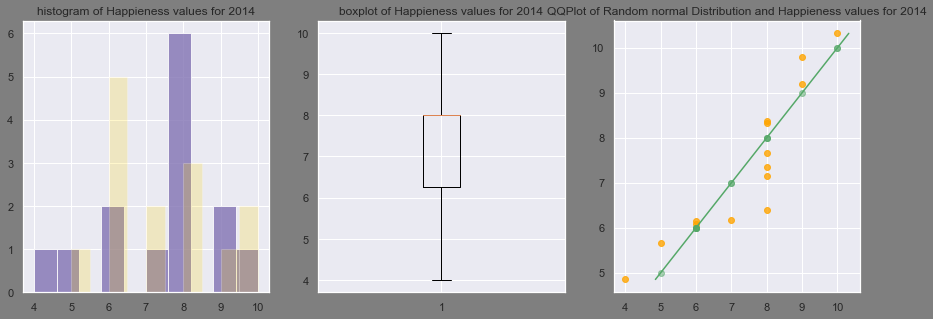

NormaltestResult(statistic=1.506462655423323, pvalue=0.4708426450576315)
For the Normality test, the null hypothesis is accepted, and the data follows a normal distribution
the Jarque berra stat is 0.952213451009327, and the pvalue is 0.6211971811268631


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [430]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'DE')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

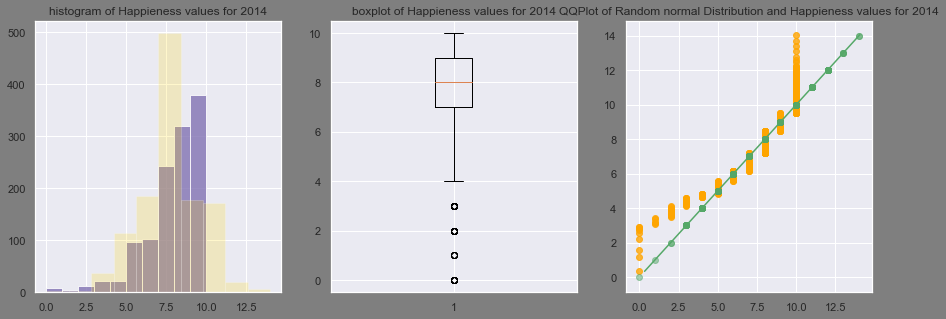

NormaltestResult(statistic=211.29946645380102, pvalue=1.3088920955899275e-46)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 378.5851849228381, and the pvalue is 0.0


In [431]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'ES')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

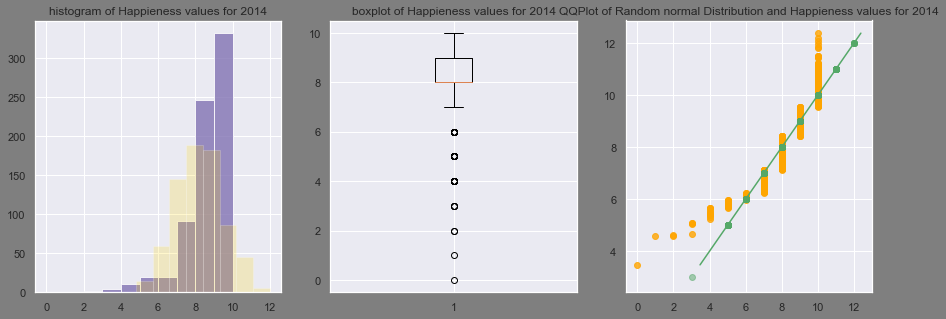

NormaltestResult(statistic=228.52086537729167, pvalue=2.38410063518236e-50)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 767.5732810187787, and the pvalue is 0.0


In [432]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'NO')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

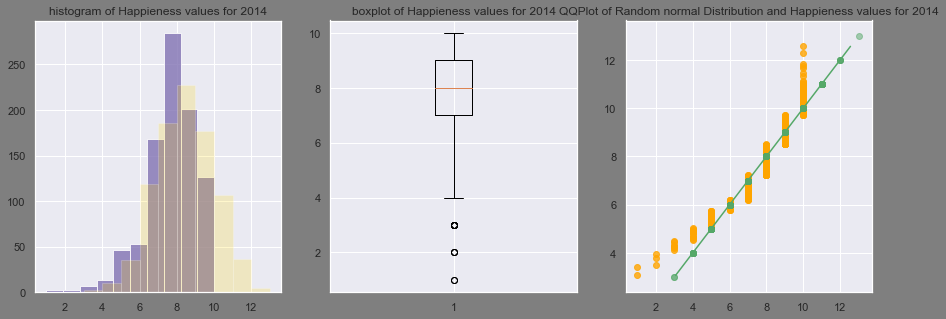

NormaltestResult(statistic=142.54243553172853, pvalue=1.1150732713309357e-31)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 243.68655591774612, and the pvalue is 0.0


In [433]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 6)&(Question2_df.cntry == 'SE')].to_list()
title = "Happieness values for 2014"
color_list = ['m','gold','orange','g']
normality_testing(data,title,color_list)

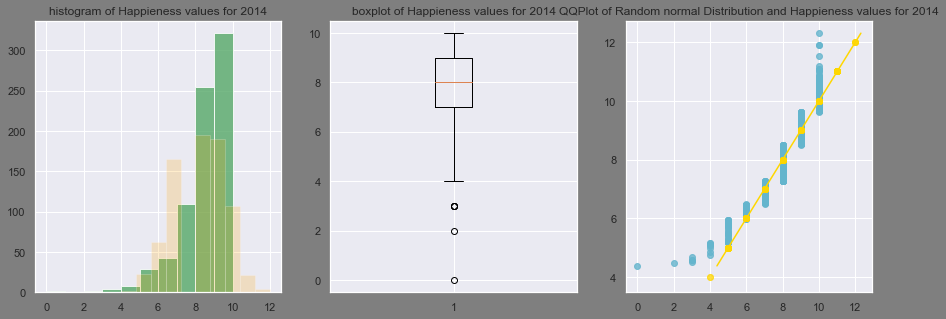

NormaltestResult(statistic=155.7517081053111, pvalue=1.509893485812781e-34)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 335.0953925044314, and the pvalue is 0.0


In [435]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'CH')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)


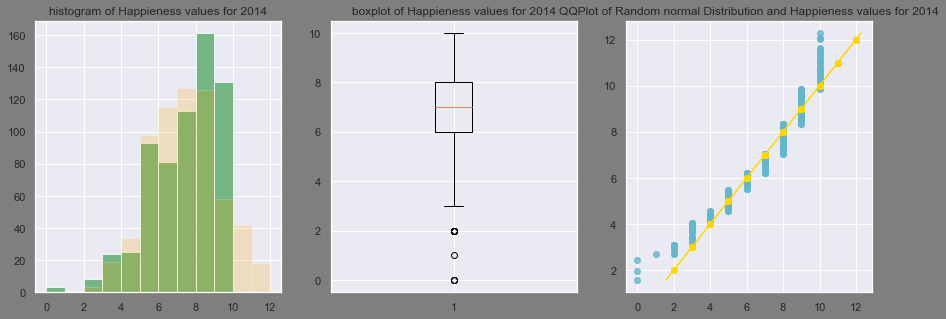

NormaltestResult(statistic=41.0748376864304, pvalue=1.2042379903191192e-09)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 47.34292996812587, and the pvalue is 5.243405709620674e-11


In [436]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'CZ')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)

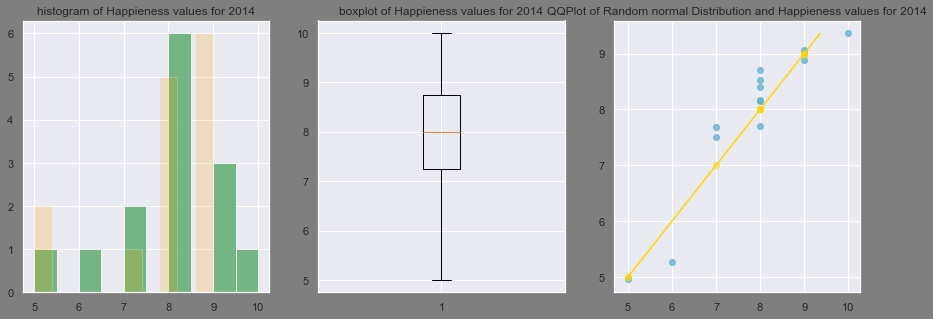

NormaltestResult(statistic=2.1782905366822414, pvalue=0.33650399143734494)
For the Normality test, the null hypothesis is accepted, and the data follows a normal distribution
the Jarque berra stat is 0.896579687527973, and the pvalue is 0.638719528327877


/Users/robertshiles/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [437]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'DE')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)

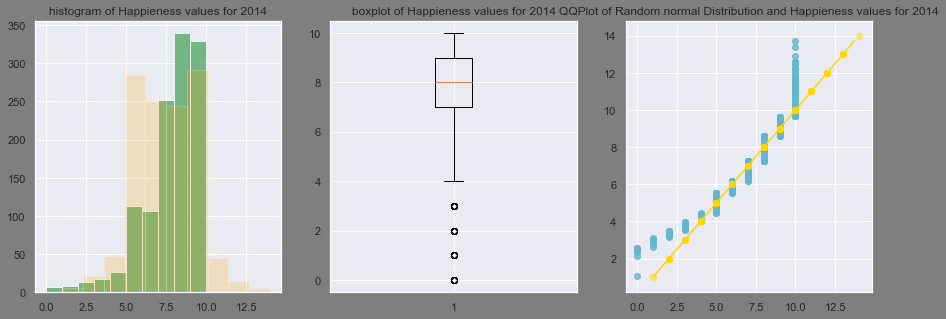

NormaltestResult(statistic=196.18322383519342, pvalue=2.5081541423450754e-43)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 340.0000437891679, and the pvalue is 0.0


In [438]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'ES')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)

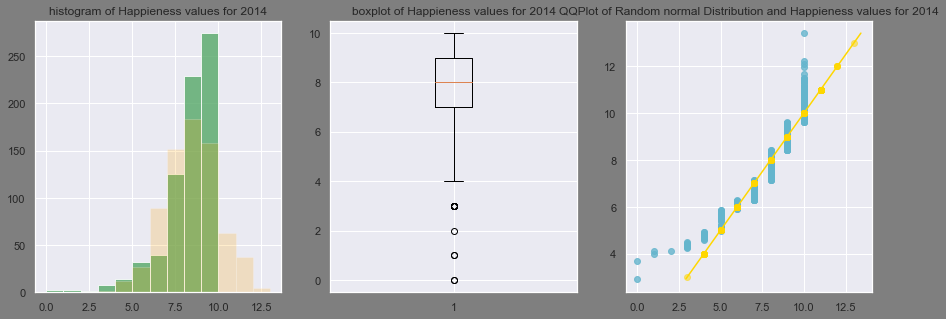

NormaltestResult(statistic=182.7050535031052, pvalue=2.1188573726282097e-40)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 454.14573100710476, and the pvalue is 0.0


In [439]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'NO')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)

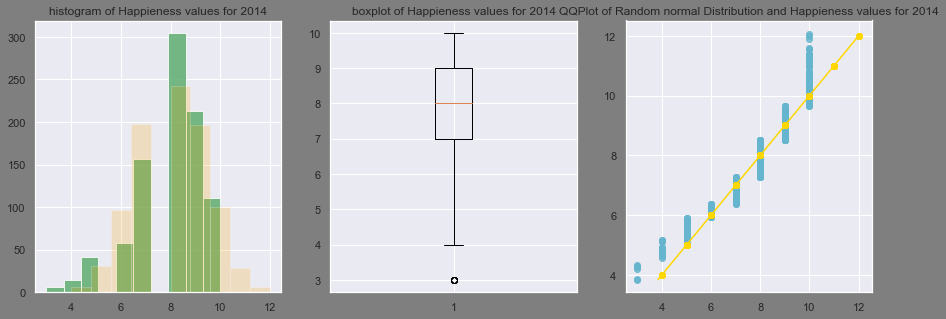

NormaltestResult(statistic=89.25928139547254, pvalue=4.1456565103809205e-20)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 116.90490778816893, and the pvalue is 0.0


In [440]:
#['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
data = Question2_df.happy.loc[(Question2_df.year == 7)&(Question2_df.cntry == 'SE')].to_list()
title = "Happieness values for 2014"
color_list = ['g','orange','c','gold']
normality_testing(data,title,color_list)

In [381]:
Question2_df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner', 'country_Idno'], dtype='object')

In [421]:
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel

Peoples_trust_df = pd.DataFrame()
country_list = []
country_list = Question1_df.cntry.unique().tolist()
W_stat =[] 
W_pval =[]
T_stat =[] 
P_vale =[]
cntry_ =[]
for country in country_list:
    w, p = wilcoxon(Question2_df.happy.loc[(Question2_df.year == 6 )&(Question2_df.cntry == country )],
                Question2_df.happy.loc[(Question2_df.year == 7)& (Question2_df.cntry == country )],
                alternative = 'less')
    
    Tstat, Pvalue = ttest_rel(Question2_df.happy.loc[(Question2_df.year == 6 )&(Question2_df.cntry == country )],
                              Question2_df.happy.loc[(Question2_df.year == 7)& (Question2_df.cntry == country )])
    W_stat.append(w)
    W_pval.append(p)
    T_stat.append(Tstat)
    P_vale.append(Pvalue)
    cntry_.append(country)
    
Peoples_trust_df['cntry_'] = cntry_
Peoples_trust_df['W_stat'] = W_stat
Peoples_trust_df['W_pval'] = W_pval
Peoples_trust_df['T_stat'] = T_stat
Peoples_trust_df['P_vale'] = P_vale

Peoples_trust_df.head()

,cntry_,W_stat,W_pval,T_stat,P_vale
0,CH,92816.5,0.494759,-0.319413,0.749500
1,CZ,73213.0,0.091597,-1.456138,0.145845
2,DE,23.5,0.196676,-0.806226,0.434614
3,ES,265544.5,0.968687,1.613832,0.106825
4,NO,103248.5,0.999996,4.285683,0.000021


### Results
Acording results from the wilcoxon test  none of the variables show a significant difference. 

Acording to the results of the Wilcoxon test, we fail to reject the nullhypothesis that the two samples have the same distribution of trust, with the same median. So it can be assumed that there is no significant difference in peoples trust between 2012 snd 2014 for each country.


# Question 3. Who reported watching more TV in 2012, men or women? 
 Because men and women are two independent groups the following tests may be used,T-test for independent samples, Mann-Whitney U test, Mood's Median Test,and or Kruskal-Wallis Test, depending on the normality of the distributions.



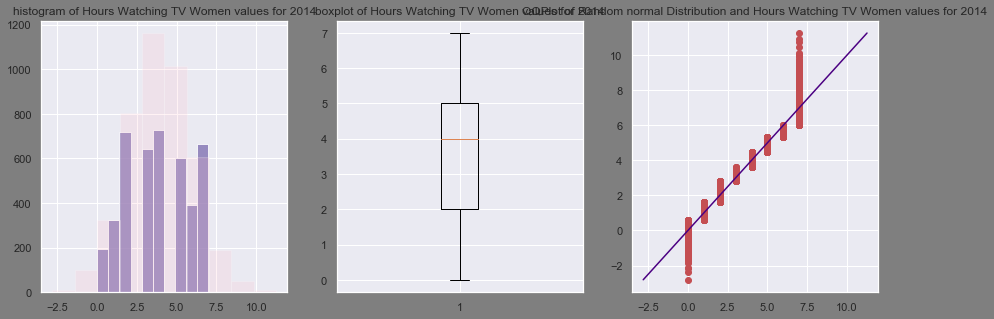

NormaltestResult(statistic=863.5253186727897, pvalue=3.0751022307731804e-188)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 170.4173046655584, and the pvalue is 0.0


In [210]:
data = EUSSdf.tvtot.loc[EUSSdf.gndr == 2 ].dropna().to_list()
title = "Hours Watching TV Women values for 2014"
color_list = ['m','pink','r','indigo']
normality_testing(data,title,color_list)

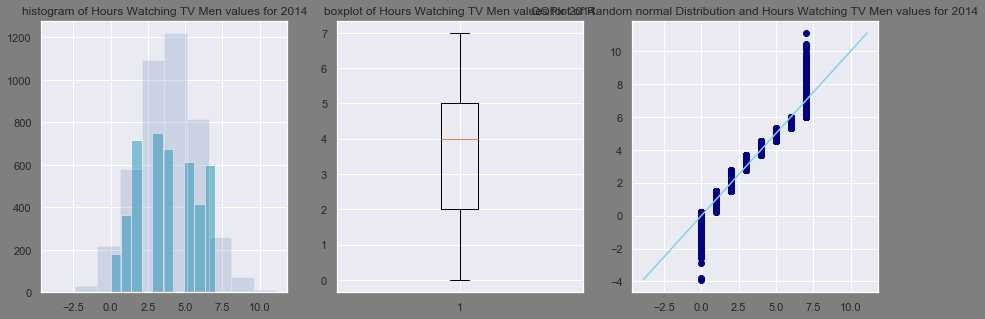

NormaltestResult(statistic=810.0047158129485, pvalue=1.2873919921927475e-176)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 168.25259491246246, and the pvalue is 0.0


In [211]:
data = EUSSdf.tvtot.loc[EUSSdf.gndr == 1 ].dropna().to_list()
title = "Hours Watching TV Men values for 2014"
color_list = ['c','b','navy','skyblue']
normality_testing(data,title,color_list)

The test and plots above suggest that the sample is not from a normal distribution. Therfore a nonparametric test will be needed

In [212]:
 EUSSdf.loc[EUSSdf.gndr == 2 ].dropna().head()


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,country_Idno
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0,CH5
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0,CH25
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0,CH28
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0,CH29
7,CH,41,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0,CH41


In [213]:
#set the samples 
Sample_men = EUSSdf.tvtot.loc[(EUSSdf.gndr == 1)& (EUSSdf.year == 6)].dropna().to_list()
Sample_wom = EUSSdf.tvtot.loc[(EUSSdf.gndr == 2) & (EUSSdf.year == 6)].dropna().to_list()

In [ ]:
df[df.gender==1&(df.year==6)][’tvtot’]
df[df.gender==2&(df.year==6)][’tvtot’]

In [214]:
from scipy.stats import median_test

stat, p, med, tbl = median_test(Sample_men,Sample_wom)
print("the Test Stat = {}, and the pvalue = {}".format(stat, p))
print("the Median is = {}".format(med))
print()

the Test Stat = 1.0160193817616423, and the pvalue = 0.31346508740654533
the Median is = 4.0



In [215]:
from scipy.stats import kruskal

kruskal(Sample_men,Sample_wom)


KruskalResult(statistic=2.4779756437672162, pvalue=0.11545076240534108)

In [216]:
from scipy.stats import mannwhitneyu
# null hypothesis that it is equally likely that a randomly selected value
#from one population will be less than or greater than
#a randomly selected value from a second population.
mannwhitneyu(Sample_men,Sample_wom, use_continuity=True, alternative=None)


MannwhitneyuResult(statistic=9014615.5, pvalue=0.057725890580185825)

### Results:
 Of the test results, None suggest that ther is a significant difference in the amount of TV watched Between Men and Women. only the Mann Whitney U test gets close to a significant differnce. 

# Question 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Depending on Normality a T-test for independent samples,Mann-Whitney U test, Mood's Median Test,and or Kruskal-Wallis Test will be used,because singles and couples are two independent groups.



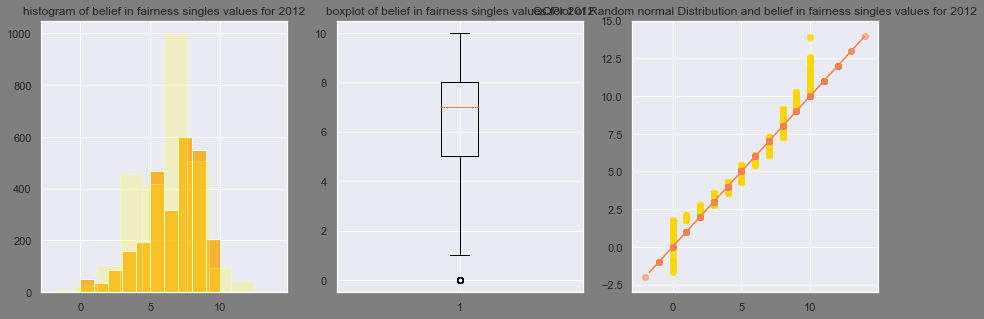

NormaltestResult(statistic=179.10400993848867, pvalue=1.2825030260118621e-39)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 215.10923552955887, and the pvalue is 0.0


In [366]:
data = EUSSdf.pplfair.loc[(EUSSdf.partner == 1)&(EUSSdf.year == 6) ].dropna().to_list()
title = "belief in fairness singles values for 2012"
color_list = ['orange','yellow','gold','coral']
normality_testing(data,title,color_list)

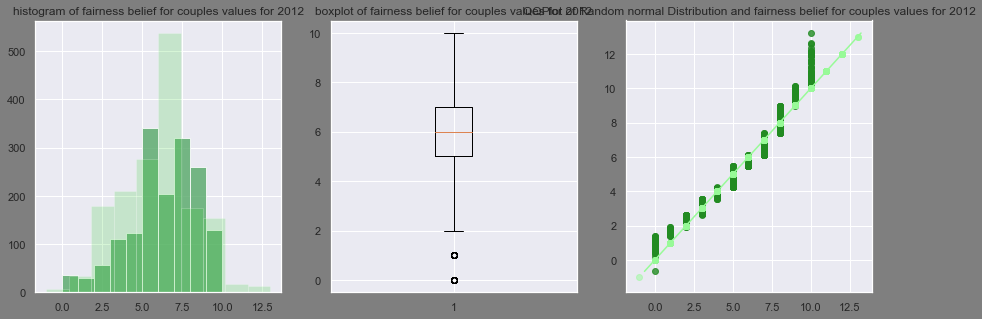

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 72.26451527305635, and the pvalue is 2.220446049250313e-16


In [442]:
data =EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()
title = "fairness belief for couples values for 2012"
color_list = ['g','limegreen','forestgreen','palegreen']
normality_testing(data,title,color_list)

In [443]:
#set the samples 
Sample_single = EUSSdf.pplfair.loc[(EUSSdf.partner == 1)&(EUSSdf.year == 6) ].dropna().to_list()
Sample_partner= EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()

In [444]:
from scipy.stats import median_test

stat, p, med, tbl = median_test(Sample_single,Sample_partner)
print("the Test Stat = {}, and the pvalue = {}".format(stat, p))
print("the Median is = {}".format(med))
print()

the Test Stat = 17.308749957810758, and the pvalue = 3.177204901948618e-05
the Median is = 6.0



In [221]:
from scipy.stats import kruskal
#The null hypothesis of the Kruskal–Wallis test is that the mean ranks of the groups are the same
#the alternative hypothesis is that the population median of one group,
#is different from the population median the other group
kruskal(Sample_single,Sample_partner)


KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

In [222]:
from scipy.stats import mannwhitneyu

mannwhitneyu(Sample_single,Sample_partner, use_continuity=True, alternative=None)

# write null hypothesis 
#null = no difference   
#alternative = there is a difference

MannwhitneyuResult(statistic=1998233.5, pvalue=0.00010499272215466025)

median belief in fairness by singles = 7.0
median belief in fairness by partners = 6.0


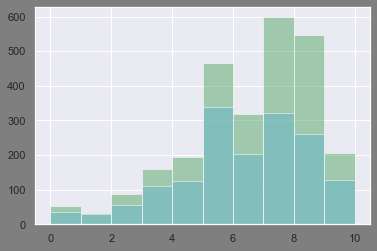

In [223]:
plt.hist(Sample_single,color = 'g', alpha = 0.5)
plt.hist(Sample_partner,color = 'c', alpha = 0.5)
print('median belief in fairness by singles = {}'.format(np.median(Sample_single)))
print('median belief in fairness by partners = {}'.format(np.median(Sample_partner)))

### Results:
the low p values with all three tests has us rejecting the null hypothesis in all three cases.This suggests that there is a significant difference beween single people and people in a relationship, and that people in a relationship are more likley to believe that people are less fair. It would be interesting to further analyze this question and look at a cross between relationship and gender. 

# Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out? 
Here a one way ANOVA, moods median test or kruskal wallace test should be used since there are more than two independent groups. since the dataframe is being divided into smaller sections it is important to see if there will be any class imbalences. the heatmap below shows the number of individuals in each cross tabulated sample



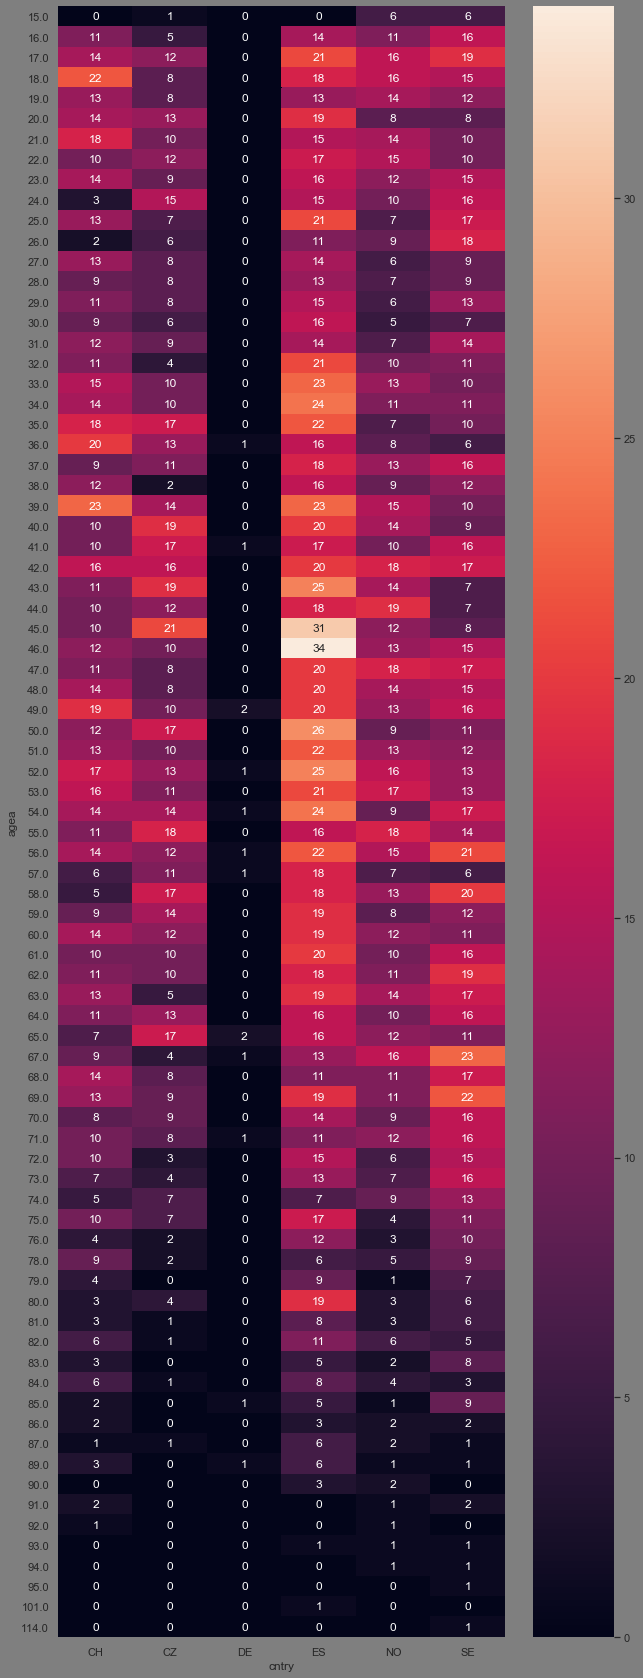

In [301]:
# create a table crosstabulating the sample size for each age group by country
crosstable = pd.crosstab(EUSSdf.agea[EUSSdf.year == 7],EUSSdf.cntry[EUSSdf.year == 7])
plt.figure(figsize=(10,30))
sns.heatmap(crosstable, annot=True)
plt.show()


It appears that there are some disparities in samples size Germany(DE) has much smaller sample size while Spaniards have a much larger sample. This may effect the reliablity of results. Germany will be droped due to its low sample size.


In [225]:
#drop Germany
#EEUSSdf = EUSSdf.drop(EUSSdf[EUSSdf.cntry=='DE'].index)

EUSSdf.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

the two tables above to the left highlight gender disparitys in samples by country and by age  with 1 being a sample of all women and -1 being a sample of all men. In the two heatmaps to the right compair single

for this question we will use  ES:Spain, CH:, NO,and CZ:Czechia

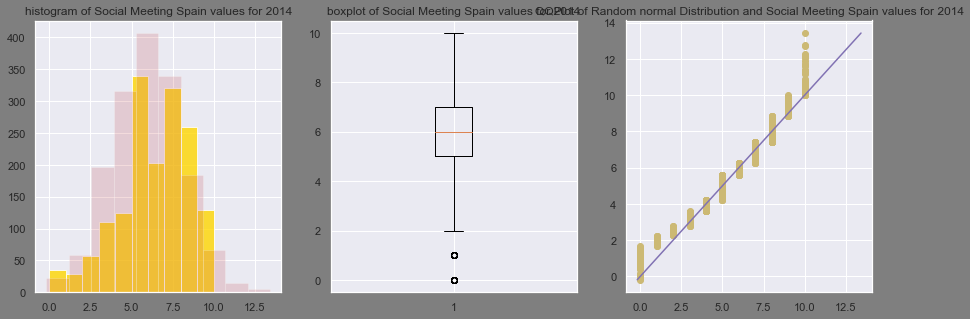

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 72.26451527305635, and the pvalue is 2.220446049250313e-16


In [228]:
data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'ES' ].dropna().to_list()
data =EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()
title = "Social Meeting Spain values for 2014"
color_list = ['gold','r','y','m']
normality_testing(data,title,color_list)

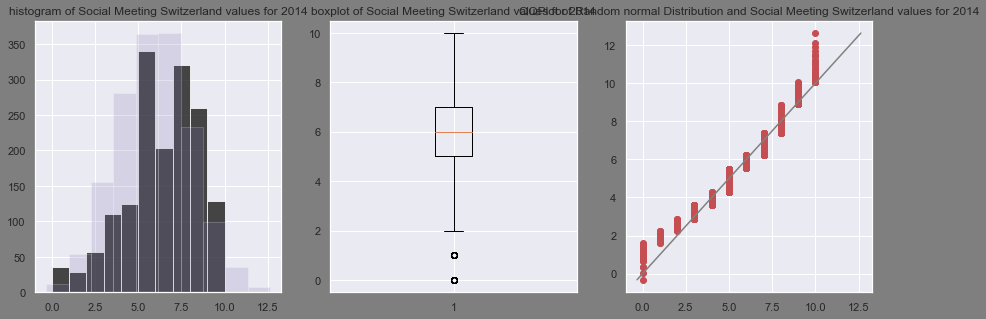

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 72.26451527305635, and the pvalue is 2.220446049250313e-16


In [229]:
data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'CH' ].dropna().to_list()
data =EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()
title = "Social Meeting Switzerland values for 2014"
color_list = ['k','m','r','grey']
normality_testing(data,title,color_list)

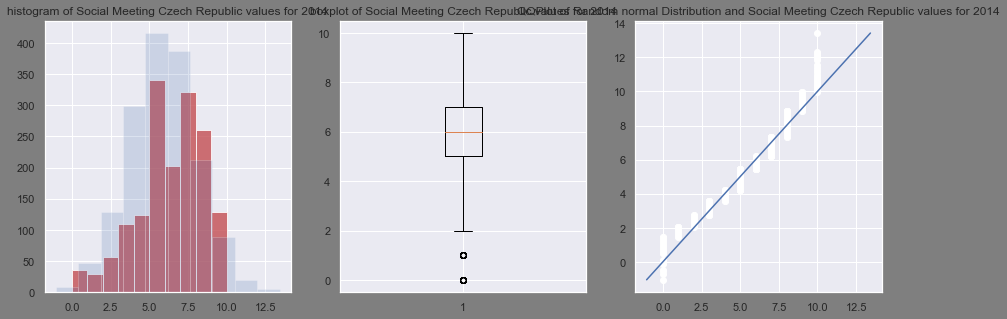

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 72.26451527305635, and the pvalue is 2.220446049250313e-16


In [230]:
data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'CZ' ].dropna().to_list()
data =EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()
title = "Social Meeting Czech Republic values for 2014"
color_list = ['r','b','w','b']
normality_testing(data,title,color_list)

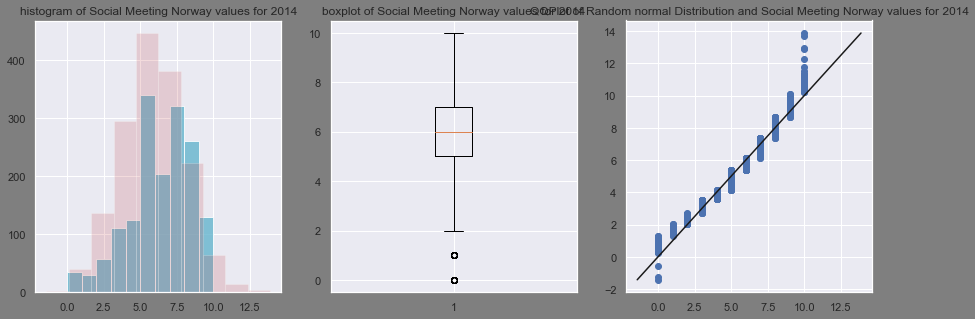

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)
For the Normality test, the alternative hypothesis is acepted, and the data does not follow a normal distribution
the Jarque berra stat is 72.26451527305635, and the pvalue is 2.220446049250313e-16


In [231]:
data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'NO' ].dropna().to_list()
data =EUSSdf.pplfair.loc[(EUSSdf.partner == 2)&(EUSSdf.year == 6) ].dropna().to_list()
title = "Social Meeting Norway values for 2014"
color_list = ['c','r','b','k']
normality_testing(data,title,color_list)

In [232]:
#Norway
NO_data = []
NO_data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'NO' ].dropna().to_list()

# Check Republic
CZ_data = []
CZ_data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'CZ' ].dropna().to_list()

#Switzerland
CH_data = []
CH_data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'CH' ].dropna().to_list()

#Spain
ES_data = []
ES_data = EUSSdf.sclmeet.loc[EUSSdf.cntry == 'ES' ].dropna().to_list()


In [304]:
from scipy.stats import median_test

stat, p, med, tbl = median_test(NO_data,CZ_data,CH_data,ES_data)
print( tbl )
print("the Test Stat = {}, and the pvalue = {}".format(stat, p))
print("the Median is = {}".format(med))


[[ 874  421  762 1248]
 [ 588  889  780 1174]]
the Test Stat = 223.3342226701987, and the pvalue = 3.8189074772914305e-48
the Median is = 5.0


In [305]:
from scipy.stats import kruskal

kruskal(NO_data,CZ_data,CH_data,ES_data)


KruskalResult(statistic=266.1743705065723, pvalue=2.0754655618286004e-57)

in both the kruscal wallace and moods median test the null hypotheis is rejected, sugessting that ther is a differenece between atleast one of the countries and their rate of social meetings. 

In [731]:
from scipy.stats import kruskal

#The null hypothesis of the Kruskal–Wallis test is that the mean ranks of the groups are the same
#the alternative hypothesis is that the population median of one group,
#is different from the population median the other group

countrylist = ['NO','CZ','CH','ES']
for i in range(0,len(countrylist)):
    for j in range(i+1,len(countrylist)):
        data1 = EUSSdf.sclmeet.loc[EUSSdf.cntry == countrylist[i] ].dropna().to_list()
        data2 =  EUSSdf.sclmeet.loc[EUSSdf.cntry == countrylist[j] ].dropna().to_list()
        kstat,p = kruskal(data1,data2)
        
        print(countrylist[i],countrylist[j])
        
        print(kstat,p)
        if p<0.05:
            print('the null hypothesis has been rejected, the population medians of the groups are different')
        else:
            print('the null hypothesis has been acepted, the population medians of the groups are not found to be different')
        print(np.mean(data1),np.mean(data2))
        print('\n')
        

NO CZ
218.97207242764313 1.5156647168342533e-49
the null hypothesis has been rejected, the population medians of the groups are different
5.416552667578659 4.5473282442748095


NO CH
44.704201049438794 2.2916508972775988e-11
the null hypothesis has been rejected, the population medians of the groups are different
5.416552667578659 5.120622568093385


NO ES
8.067125980923539 0.004507555585313711
the null hypothesis has been rejected, the population medians of the groups are different
5.416552667578659 5.244426094137077


CZ CH
98.0929684717642 3.9919383581262487e-23
the null hypothesis has been rejected, the population medians of the groups are different
4.5473282442748095 5.120622568093385


CZ ES
179.61865582178152 5.870616343949006e-41
the null hypothesis has been rejected, the population medians of the groups are different
4.5473282442748095 5.244426094137077


CH ES
16.521750253447568 4.809519199594451e-05
the null hypothesis has been rejected, the population medians of the groups 

Median for how often Norwegians socialy meet = 6.0
Median for how often Czechs socialy meet = 5.0
Median for how often Swiss socialy meet = 5.0
Median for how often Spaniards socialy meet= 6.0


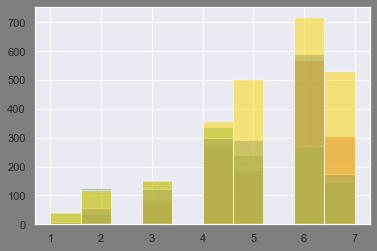

In [235]:
plt.hist(NO_data,color = 'r', alpha = 0.5)
plt.hist(CZ_data,color = 'g', alpha = 0.5)
plt.hist(CH_data,color = 'b', alpha = 0.5)
plt.hist(ES_data,color = 'gold', alpha = 0.5)

print('Median for how often Norwegians socialy meet = {}'.format(np.median(NO_data)))
print('Median for how often Czechs socialy meet = {}'.format(np.median(CZ_data)))
print('Median for how often Swiss socialy meet = {}'.format(np.median(SE_data)))
print('Median for how often Spaniards socialy meet= {}'.format(np.median(ES_data)))

### Results
Acording to the results from the Kruskal Wallis tests each country differs from one another in a significant way. with spaniards and norwegians meeting more than czechs and swiss.  in order from greatest to leas of those who meet more are Norwegeians, Spanish, Swiss, and finaly Czechs. 

# Question 6.Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out? 
Here a one way ANOVA,moods median test, or kruskal wallace test should be used  depending on normality ,since there are more than two independent groups. if age groups are fond to be statistaly different then the age group will be compaired on an individual basis 

In [657]:
#create a Dataframe to Store the Results of the analysis in 
Question_6_Results=pd.DataFrame()

In [658]:
from scipy.stats import normaltest
from scipy.stats import median_test
from scipy.stats import kruskal

#create a Dataframe to Store the Results of the analysis in 

country_list = []
#country_list = EUSSdf.cntry.unique()
country_list = ['NO','ES','CH','CZ']
age_list = []
age_list = EUSSdf.agea.unique()
age_list = sorted(age_list)


#create empty lists to use in the for loop
Norm_stat_Array = []
info_array = []
cntry = []
agea = []
norm_pvalue = []
for country in country_list:
    for age in age_list:
        try:
            data = EUSSdf['sclact'][(EUSSdf.cntry == country)&(EUSSdf.agea == age)&(EUSSdf.year == 7)]
            Norm_stat,norm_pval = normaltest(data)
            #print(Norm_stat[0])
            #print(Norm_stat[1])

            #Norm_stat_Array.extend([country,age,Norm_stat,norm_pval])
            #info_array.append([country,age])
            #norm_pvalue.extend(norm_pval)
            
        except:
            #Norm_stat_Array.extend([country,age,np.nan,np.nan])
            Norm_stat,norm_pval = np.nan,np.nan
            #norm_pvalue.extend(np.nan)

        
        Norm_stat_Array.extend([country,age,Norm_stat,norm_pval])

Question_6_Results = pd.DataFrame()
array_length = len(Norm_stat_Array)
Question_6_Results['country']=Norm_stat_Array[::4]
Question_6_Results['age']=Norm_stat_Array[1::4]
Question_6_Results['norm_stat']=Norm_stat_Array[2::4]
Question_6_Results['norm_p_val']=Norm_stat_Array[3::4]
Question_6_Results = Question_6_Results.sort_values(by=['norm_p_val'], axis=0)
Question_6_Results.head(array_length)


,country,age,norm_stat,norm_p_val
296,CZ,49.0,28.555863,6.297571e-07
306,CZ,69.0,25.837098,2.452141e-06
1,NO,20.0,22.957449,1.034792e-05
281,CZ,60.0,17.776098,1.380287e-04
121,ES,31.0,17.423447,1.646442e-04
98,ES,36.0,13.390591,1.236716e-03
178,CH,30.0,12.705675,1.741798e-03
255,CZ,22.0,11.982486,2.500554e-03
2,NO,21.0,11.333669,3.458797e-03
35,NO,19.0,11.333669,3.458797e-03


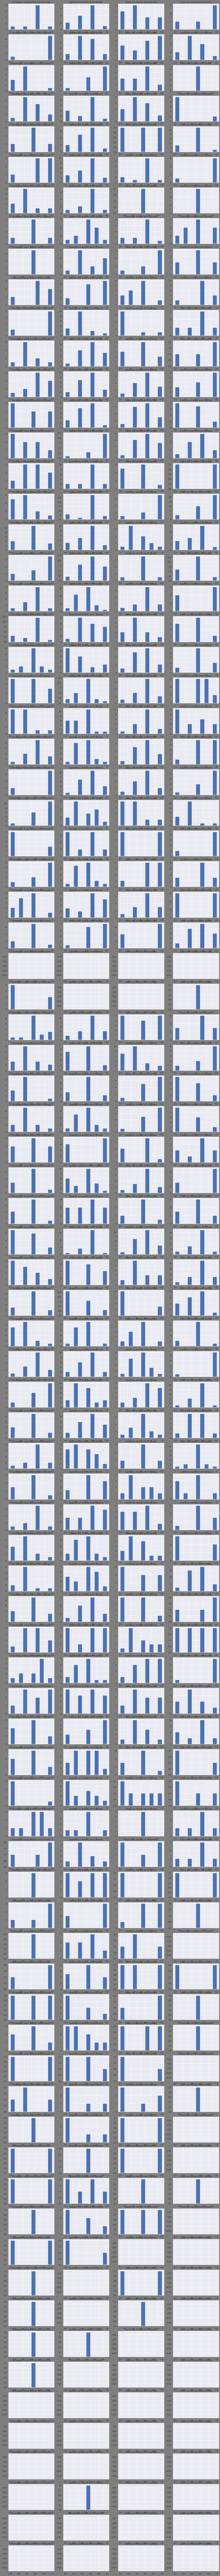

In [659]:
country_list = ['NO','ES','CH','CZ']
age_list = []
age_list = EUSSdf.agea.unique()
age_list = sorted(age_list)
plt.figure(figsize=(20,250))

for i,age in enumerate(age_list,1):
        p = (i*j)
        
        plt.subplot(len(age_list),4,p-3)
        plt.hist(EUSSdf['sclact'][(EUSSdf.cntry == 'NO')&(EUSSdf.agea == age)&(EUSSdf.year == 7)])
        plt.title('Norwegian social Activity for{}yrolds'.format(age))
        
        plt.subplot(len(age_list),4,p-2)
        plt.hist(EUSSdf['sclact'][(EUSSdf.cntry == 'ES')&(EUSSdf.agea == age)&(EUSSdf.year == 7)])
        plt.title('Spanish soc Activity for{}yrolds '.format(age))

        plt.subplot(len(age_list),4,p-1)
        plt.hist(EUSSdf['sclact'][(EUSSdf.cntry == 'CH')&(EUSSdf.agea == age)&(EUSSdf.year == 7)])
        plt.title('Swiss soc Activity for{}yrolds'.format(age))

        plt.subplot(len(age_list),4,p)
        plt.hist(EUSSdf['sclact'][(EUSSdf.cntry == 'CZ')&(EUSSdf.agea == age)&(EUSSdf.year == 7)])
        plt.title('Czech soc Activity for{}yrolds'.format(age))

plt.show()

Though some samples show a tendency towards Normality, quite a lot of the data is irregular, therefore the Moods Median Test Should be used to determin which age groups should be further tested. 


In [660]:
# calculate the Moodes median for each Age 

country_list = []
#country_list = EUSSdf.cntry.unique()
country_list = ['NO','ES','CH','CZ']
age_list = []
age_list = EUSSdf.agea.unique()
age_list = sorted(age_list)


Question_6_Results['Mood_Chi_square'] = np.nan
Question_6_Results['Mood_Pval'] = np.nan
Question_6_Results['Median_soc_act_age'] = np.nan

tests = []

for age in age_list:
    try:
        stat, p, med, tbl = median_test(EUSSdf.sclmeet.loc[(EUSSdf.agea == age)&(EUSSdf.cntry == 'NO')&(EUSSdf.year==7) ].dropna().to_list(),
                                        EUSSdf.sclmeet.loc[(EUSSdf.agea == age)&(EUSSdf.cntry == 'SE')&(EUSSdf.year==7) ].dropna().to_list(),
                                        EUSSdf.sclmeet.loc[(EUSSdf.agea == age)&(EUSSdf.cntry == 'CZ')&(EUSSdf.year==7) ].dropna().to_list(),
                                        EUSSdf.sclmeet.loc[(EUSSdf.agea == age)&(EUSSdf.cntry == 'ES')&(EUSSdf.year==7) ].dropna().to_list())
        
        Question_6_Results['Mood_Chi_square'].loc[Question_6_Results['age']== age] = stat
        Question_6_Results['Mood_Pval'].loc[Question_6_Results['age']== age] = p
        Question_6_Results['Median_soc_act_age'].loc[Question_6_Results['age']== age] = med

       

    except:
        None
        
   
Question_6_Results = Question_6_Results.sort_values(by=['Mood_Pval'], axis=0)

Question_6_Results.head(400)


,country,age,norm_stat,norm_p_val,Mood_Chi_square,Mood_Pval,Median_soc_act_age
181,CH,35.0,NaN,NaN,16.550761,0.000874,5.0
13,NO,35.0,NaN,NaN,16.550761,0.000874,5.0
265,CZ,35.0,1.619084,4.450618e-01,16.550761,0.000874,5.0
97,ES,35.0,0.465595,7.923140e-01,16.550761,0.000874,5.0
123,ES,37.0,2.643016,2.667327e-01,13.698683,0.003345,5.0
291,CZ,37.0,0.078879,9.613279e-01,13.698683,0.003345,5.0
39,NO,37.0,0.082426,9.596247e-01,13.698683,0.003345,5.0
207,CH,37.0,0.855231,6.520620e-01,13.698683,0.003345,5.0
187,CH,46.0,2.625225,2.691160e-01,13.272570,0.004083,5.0
19,NO,46.0,2.945374,2.293086e-01,13.272570,0.004083,5.0


In [664]:
#drop rows with null values for he pvalue
Question_6_Results = Question_6_Results.dropna(subset=['Mood_Pval'])

#create a list of ages that have significant moods median pvalues 
significant_Ages = Question_6_Results['age'].loc[(Question_6_Results['Mood_Pval']<0.05)].to_list()
#delete duplicate numbers in the age list
significant_Ages = sorted(significant_Ages)
last_num = 0
sigagewoutdup=[]
for num in significant_Ages:
    if num != last_num:
        sigagewoutdup.append(num)
    else:
        None
    last_num = num
    
significant_Ages = sigagewoutdup
print(significant_Ages)


[32.0, 35.0, 37.0, 39.0, 42.0, 44.0, 45.0, 46.0, 48.0, 49.0, 56.0, 58.0, 65.0, 75.0, 82.0]


In the list above we can see the ages that had a significant difference in attendence in social activities between countries, based in the Moods Median Test. next we will take these ages and compair each of the countries against each other. Since the sample sizes are so small  the Kruskal Wallice H test will be used since it can handle  samples down to 5 individuals where as the Manwhitney U requires sample sizes of 20 or greater. 

In [716]:
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from numpy import math
country_list = ['NO','ES','CH','CZ']
age_list = []
age_list = significant_Ages

plt.figure(figsize=(20,250))
for country1 in country_list:
    Question_6_Results['krus_stat{}'.format(country1)] = np.nan
    Question_6_Results['krus_pval{}'.format(country1)] = np.nan
    for age in age_list: 
          for country2 in country_list:
                p1 = 0
                p2 = 0
                alpha = 0
                median = 0
                data1=[]
                data2=[]
                data1= EUSSdf['sclact'].loc[(EUSSdf.cntry == country1)&(EUSSdf.agea == age)&(EUSSdf.year == 7)].to_list()
                data2= EUSSdf['sclact'].loc[(EUSSdf.cntry == country2)&(EUSSdf.agea == age)&(EUSSdf.year == 7)].to_list()
                try:
                    #MWU_test,MWU_pval = mannwhitneyu(data1,data2)
                    krus_stat, krus_pval = kruskal(data1,data2)
                     #stat, p, med, tbl = median_test(data1,data2)
                    #print(kruskal(data1,data2))
                except:
                    None
                Question_6_Results['krus_stat{}'.format(country1)][(Question_6_Results.country == country2)&(Question_6_Results.age == age)] = krus_stat
                Question_6_Results['krus_pval{}'.format(country1)][(Question_6_Results.country == country2)&(Question_6_Results.age == age)] = krus_pval

               


Question_6_Results.head(60)



,country,age,norm_stat,norm_p_val,Mood_Chi_square,Mood_Pval,Median_soc_act_age,man_U_statNO,manu_pvalNO,man_U_statES,manu_pvalES,man_U_statCH,manu_pvalCH,man_U_statCZ,manu_pvalCZ,krus_statNO,krus_pvalNO,krus_statES,krus_pvalES,krus_statCH,krus_pvalCH,krus_statCZ,krus_pvalCZ
181,CH,35.0,NaN,NaN,16.550761,0.000874,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NO,35.0,NaN,NaN,16.550761,0.000874,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,1.073578e+00,0.300139,NaN,NaN,0.267615,0.604936
265,CZ,35.0,1.619084,4.450618e-01,16.550761,0.000874,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.676147e-01,0.604936,5.449949e-01,0.460370,NaN,NaN,0.000000,1.000000
97,ES,35.0,0.465595,7.923140e-01,16.550761,0.000874,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.073578e+00,0.300139,0.000000e+00,1.000000,NaN,NaN,0.544995,0.460370
123,ES,37.0,2.643016,2.667327e-01,13.698683,0.003345,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.190378e-01,0.639774,0.000000e+00,1.000000,0.500741,0.479175,0.645354,0.421779
291,CZ,37.0,0.078879,9.613279e-01,13.698683,0.003345,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.432861e-01,0.621843,6.453536e-01,0.421779,0.001882,0.965401,0.000000,1.000000
39,NO,37.0,0.082426,9.596247e-01,13.698683,0.003345,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.924387e-14,1.000000,2.190378e-01,0.639774,0.222115,0.637433,0.243286,0.621843
207,CH,37.0,0.855231,6.520620e-01,13.698683,0.003345,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.221154e-01,0.637433,5.007407e-01,0.479175,0.000000,1.000000,0.001882,0.965401
187,CH,46.0,2.625225,2.691160e-01,13.272570,0.004083,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.758160e-01,0.599457,3.245469e-01,0.568888,0.000000,1.000000,0.949161,0.329933
19,NO,46.0,2.945374,2.293086e-01,13.272570,0.004083,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.882552e-14,1.000000,1.516244e-03,0.968939,0.275816,0.599457,0.252112,0.615592


<Figure size 1440x18000 with 0 Axes>

In [717]:
Question_6_Results.columns

Index(['country', 'age', 'norm_stat', 'norm_p_val', 'Mood_Chi_square', 'Mood_Pval', 'Median_soc_act_age', 'man_U_statNO', 'manu_pvalNO', 'man_U_statES', 'manu_pvalES', 'man_U_statCH', 'manu_pvalCH', 'man_U_statCZ', 'manu_pvalCZ', 'krus_statNO', 'krus_pvalNO', 'krus_statES', 'krus_pvalES', 'krus_statCH', 'krus_pvalCH', 'krus_statCZ', 'krus_pvalCZ'], dtype='object')

In [718]:
'krus_pvalNO','krus_pvalES','krus_pvalCH','krus_pvalCZ'

#The null hypothesis of the Kruskal–Wallis test is that the mean ranks of the groups are the same
#the alternative hypothesis is that the population median of one group,
#is different from the population median the other group
diff_norwy =  Question_6_Results[['country', 'age']].loc[(Question_6_Results.krus_pvalNO<0.05)]
diff_spain =  Question_6_Results[['country', 'age']].loc[(Question_6_Results.krus_pvalES<0.05)]
diff_switz =  Question_6_Results[['country', 'age']].loc[(Question_6_Results.krus_pvalCH<0.05)]
diff_czech =  Question_6_Results[['country', 'age']].loc[(Question_6_Results.krus_pvalCZ<0.05)]

print('diff_norwy\n',diff_norwy,'\n')
print('diff_spain\n',diff_spain,'\n')
print('diff_switz\n',diff_switz,'\n')
print('diff_czech\n',diff_czech,'\n')

diff_norwy
     country   age
215      CH  58.0
273      CZ  48.0 

diff_spain
 Empty DataFrame
Columns: [country, age]
Index: [] 

diff_switz
     country   age
299      CZ  58.0
47       NO  58.0 

diff_czech
     country   age
215      CH  58.0
21       NO  48.0 



In [719]:
#show descrptive statistics for the 
for age in [58.0,48.0]:
    for country in ['CH','NO','CZ']:

        median = EUSSdf['sclact'].loc[(EUSSdf.cntry == country)&(EUSSdf.agea == age)&(EUSSdf.year == 7)].describe()
        
        print(country,age,median)

CH 58.0 count    5.000000
mean     2.000000
std      0.707107
min      1.000000
25%      2.000000
50%      2.000000
75%      2.000000
max      3.000000
Name: sclact, dtype: float64
NO 58.0 count    13.000000
mean      2.846154
std       0.800641
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: sclact, dtype: float64
CZ 58.0 count    17.000000
mean      3.000000
std       0.866025
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: sclact, dtype: float64
CH 48.0 count    14.000000
mean      2.642857
std       0.841897
min       1.000000
25%       2.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: sclact, dtype: float64
NO 48.0 count    14.000000
mean      3.000000
std       0.960769
min       1.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       5.000000
Name: sclact, dtype: float64
CZ 48.0 count    8.00000
mean     2.12500
std      0.64087
min 

swizerland the czech republic and norway are significantly different at the ages of 48 and 58 Switzerland apears to be the leas

### Question 6 Results:
swizerland the czech republic and norway are significantly different at the ages of 48 and 58. Switzerland apears to be the least socialy active at the age of 58, while the czech republic is the least active at 48. Norway apears to hold steady hovering around 3 for both age groups. 

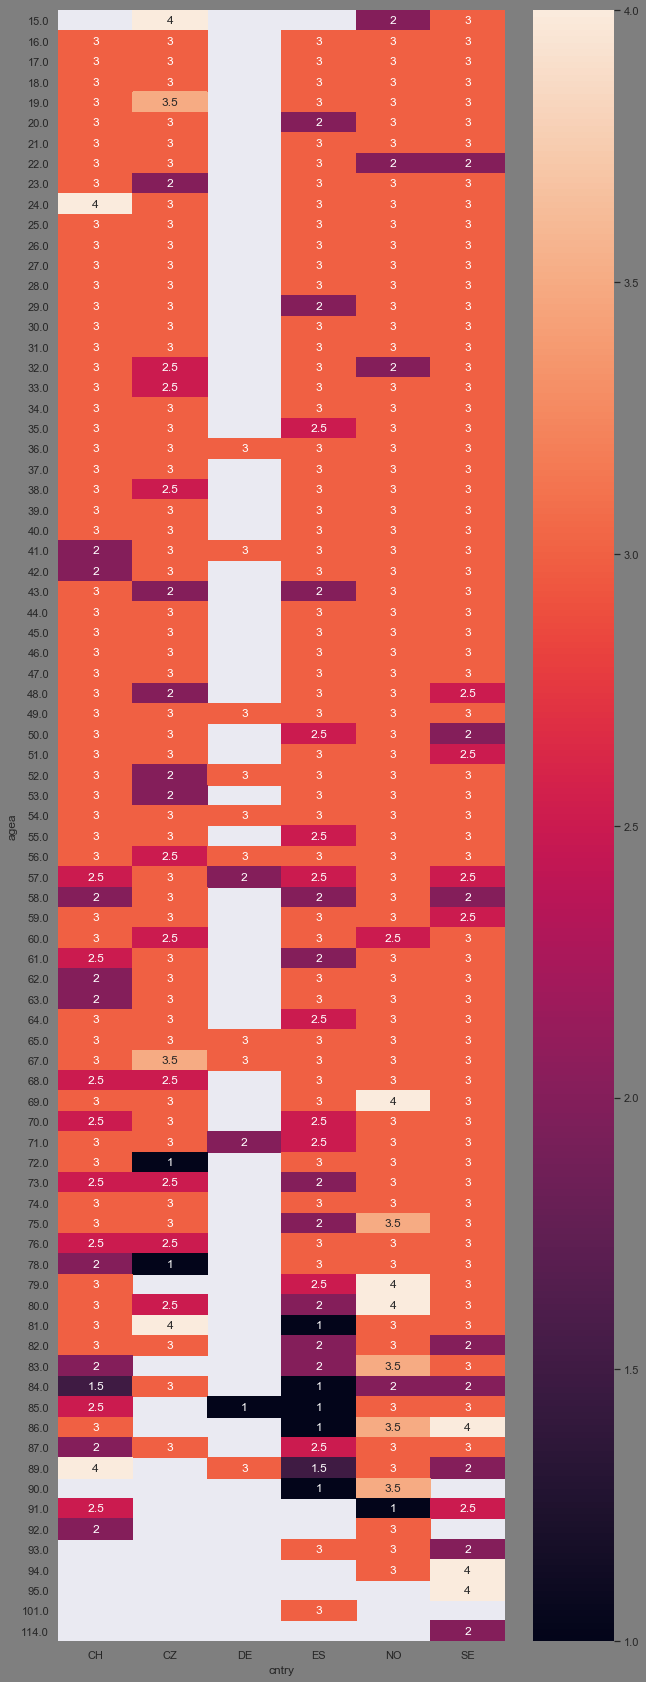

In [721]:
# create a table crosstabulating the sample size for each age group by country
country_list = []
#country_list = EUSSdf.cntry.unique()
country_list = ['NO','ES','CH','CZ']
age_list = []
age_list = EUSSdf.agea.unique()
age_list = sorted(age_list)

crosstable = pd.crosstab(EUSSdf.agea[EUSSdf.year == 7],
                         EUSSdf.cntry[EUSSdf.year == 7]
                         ,values=EUSSdf.sclact,
                         aggfunc='median').round(3)



plt.figure(figsize=(10,30))
sns.heatmap(crosstable, annot=True)
plt.show()